In [1]:
!pip install evaluate bert_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
predictions_file = "/content/drive/MyDrive/search/videoQA/predictions.jsonl"
references_file = "/content/drive/MyDrive/search/videoQA/references.jsonl"

In [4]:
import json

def load_jsonl(path):
    data = []
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            if line.strip():  # 空行を無視
                data.append(json.loads(line))
    return data

In [5]:
predictions_data = load_jsonl(predictions_file)
references_data = load_jsonl(references_file)
predictions_answers = [item['answer'] for item in predictions_data]
references_answers = [item['answer'] for item in references_data]

In [6]:
# structure
predictions_data[0]

{'video_id': '0001',
 'qa_id': '01',
 'question': 'Why did protesters play drums after receiving a police warning?',
 'answer': 'They drummed in response to a call to resist.',
 'span': ['[14.516, 18.381]', '[89.758, 103.396]', '[103.437, 112.57]'],
 'hot_vector': [0, 1, 0, 0, 0, 1, 1]}

In [7]:
from evaluate import load

bertscore = load("bertscore")
results = bertscore.compute(predictions=predictions_answers, references=references_answers, lang="en")

print(results)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'precision': [0.9013242125511169, 0.8892909288406372, 0.8785380721092224, 0.9195989370346069, 0.9654098749160767, 0.8810422420501709, 0.900680422782898, 0.9788616299629211, 0.9121016263961792, 0.9743281006813049, 0.8695380687713623, 0.8856109380722046, 0.9066066741943359, 0.830479085445404, 0.8759585618972778, 0.9521694183349609, 0.8928714990615845, 0.8897477984428406, 0.9225386381149292, 0.9185978174209595, 0.9148008227348328, 0.8823542594909668, 0.8873031139373779, 0.8814530968666077, 0.9141904711723328, 0.8815014958381653, 0.9744687676429749, 0.8907309770584106, 0.8826890587806702, 0.8686015605926514], 'recall': [0.9014549255371094, 0.8951540589332581, 0.8774576187133789, 0.9165215492248535, 0.9633164405822754, 0.8975645303726196, 0.8867900967597961, 0.9909452199935913, 0.891297459602356, 0.9767425060272217, 0.8736182451248169, 0.8768887519836426, 0.943803071975708, 0.8933282494544983, 0.8621453046798706, 0.9474819302558899, 0.8901658058166504, 0.9298462271690369, 0.908153831958770

In [21]:
import pandas as pd

df_BERT = pd.DataFrame({
    "BERTScore_precision": results["precision"],
    "BERTScore_recall": results["recall"],
    "BERTScore_f1": results["f1"],
})


In [20]:
records = []

for pred, ref in zip(predictions_data, references_data):

    records.append({
        "video_id": pred["video_id"],
        "qa_id": pred["qa_id"],
        "question": pred["question"],
        "pred_answer": pred["answer"],
        "ref_answer": ref["answer"],
    })

df = pd.DataFrame(records)

In [25]:
df_all = pd.concat([df, df_BERT], axis=1)

df_all

video_id qa_id                                           question  \
0      0001    01  Why did protesters play drums after receiving ...   
1      0001    02  How did the initial protest march lead to the ...   
2      0001    03  What might have happened if the spokesperson h...   
3      0002    01  What would have happened if voters did not get...   
4      0002    02  How did passing the health screening at the ga...   
5      0002    03  Why did the first woman talk to the camera aft...   
6      0003    01  Why were the fighters interviewed separately a...   
7      0003    02  Why did the tense face-off lead to Mayweather ...   
8      0003    03  What element would be lost if the event skippe...   
9      0004    01  How did the room's setup foreshadow the topics...   
10     0004    02  Why did Gantz thank the US after entering the ...   
11     0004    03  Why did the men exit after outlining their dis...   
12     0005    01  After arriving at the plaza, what prompted Pre...   
13     0005    02  What event involving Claudio Ciampi occurred a...   
14     0005    03  What two main events took place between Presid...   
15     0006    01  Why was a police car present before the team's...   
16     0006    02  What would have happened if the bus had not be...   
17     0006    03  What action by the team prompted a supporter t...   
18     0007    01  After arriving at the airport, what was requir...   
19     0007    02  Why did the diplomats and their families under...   
20     0007    03  How did the Russian diplomats get from their e...   
21     0008    01  Why does Johnson roll his sleeve down after th...   
22     0008    02  How did the administration of the shot lead to...   
23     0008    03  How did Johnson rolling up his sleeve ultimate...   
24     0009    01  What would have happened to the dogs if their ...   
25     0009    02  Why did the owner push the mother bear after i...   
26     0009    03  Why did the owner first push the bear and then...   
27     0010    01  If the Queen had only arrived and then left, w...   
28     0010    02  After arriving for the State Opening of Parlia...   
29     0010    03  After her arrival and before her departure, wh...   

                                          pred_answer  \
0       They drummed in response to a call to resist.   
1   Marchers listened to a speech calling for resi...   
2        The drumming likely would not have occurred.   
3   They would have been denied entry to the polli...   
4   It granted them access to the polling station ...   
5   She was being interviewed by a journalist afte...   
6   To provide individual interview opportunities ...   
7   To contrast his elite experience with Paul's Y...   
8   The tense and confrontational face-off between...   
9   The US and Israeli flags signaled a diplomatic...   
10  He thanked the US for its ongoing support for ...   
11  They left the press to begin their private dis...   
12  The conclusion of the inauguration ceremony fo...   
13  A plaza was inaugurated in the name of Carlo A...   
14  A musical performance and an inauguration cere...   
15         To provide a security escort for the team.   
16            The team would have had to wait for it.   
17  The team, including Riyad Mahrez, left the hotel.   
18  They underwent passport and security checks be...   
19  They were departing the country on a governmen...   
20     They traveled from the embassy by bus and van.   
21  Johnson rolls his sleeve down because the inje...   
22  The shot concluded his appointment, so he left...   
23  Rolling up his sleeve enabled him to get vacci...   
24  The bear would have likely mauled or killed th...   
25  To stop the bear from attacking and killing he...   
26        To save her dogs and then escape to safety.   
27  Opening Parliament and setting out government ...   
28       Giving a blessing and departing the chamber.   
29  Opening Parliament and setting out the governm...   

  

In [9]:
print("Average BERTScores:")
print(f"Precision: {df['precision'].mean():.3f}")
print(f"Recall:    {df['recall'].mean():.3f}")

Average BERTScores:
Precision: 0.904
Recall:    0.909


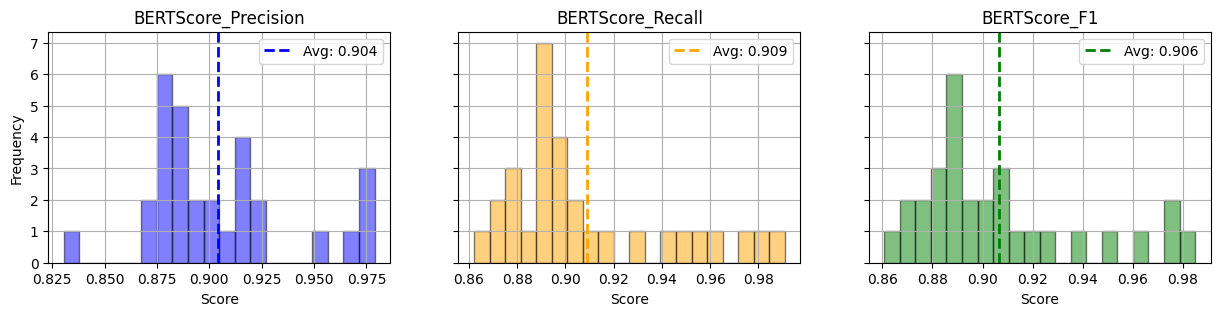

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 平均値
mean_precision = np.mean(results["precision"])
mean_recall = np.mean(results["recall"])
mean_f1 = np.mean(results["f1"])

# サブプロット作成（1行3列）
fig, axes = plt.subplots(1, 3, figsize=(15, 3), sharey=True)

# Precision
axes[0].hist(results["precision"], bins=20, alpha=0.5, color='blue', edgecolor='black')
axes[0].axvline(mean_precision, color='blue', linestyle='dashed', linewidth=2, label=f'Avg: {mean_precision:.3f}')
axes[0].set_title("BERTScore_Precision")
axes[0].set_xlabel("Score")
axes[0].set_ylabel("Frequency")
axes[0].legend()
axes[0].grid(True)

# Recall
axes[1].hist(results["recall"], bins=20, alpha=0.5, color='orange', edgecolor='black')
axes[1].axvline(mean_recall, color='orange', linestyle='dashed', linewidth=2, label=f'Avg: {mean_recall:.3f}')
axes[1].set_title("BERTScore_Recall")
axes[1].set_xlabel("Score")
axes[1].legend()
axes[1].grid(True)

# F1
axes[2].hist(results["f1"], bins=20, alpha=0.5, color='green', edgecolor='black')
axes[2].axvline(mean_f1, color='green', linestyle='dashed', linewidth=2, label=f'Avg: {mean_f1:.3f}')
axes[2].set_title("BERTScore_F1")
axes[2].set_xlabel("Score")
axes[2].legend()
axes[2].grid(True)




##根拠となるイベントの選択部分



In [11]:
# structure
predictions_data[0]

{'video_id': '0001',
 'qa_id': '01',
 'question': 'Why did protesters play drums after receiving a police warning?',
 'answer': 'They drummed in response to a call to resist.',
 'span': ['[14.516, 18.381]', '[89.758, 103.396]', '[103.437, 112.57]'],
 'hot_vector': [0, 1, 0, 0, 0, 1, 1]}

In [12]:
def calc_metrics(pred, ref):
    assert len(pred) == len(ref), "Input lists must have the same length."

    tp = sum(p == 1 and r == 1 for p, r in zip(pred, ref))
    fp = sum(p == 1 and r == 0 for p, r in zip(pred, ref))
    fn = sum(p == 0 and r == 1 for p, r in zip(pred, ref))

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0.0

    return precision, recall, f1

In [13]:
metrics_per_sample = []
for pred, ref in zip(predictions_data, references_data):
    p, r, f1 = calc_metrics(pred["hot_vector"], ref["hot_vector"])
    metrics_per_sample.append((p, r, f1))

avg_precision = sum(m[0] for m in metrics_per_sample) / len(metrics_per_sample)
avg_recall = sum(m[1] for m in metrics_per_sample) / len(metrics_per_sample)

print(f"Average Precision: {avg_precision:.3f}")
print(f"Average Recall:    {avg_recall:.3f}")

Average Precision: 0.589
Average Recall:    0.547


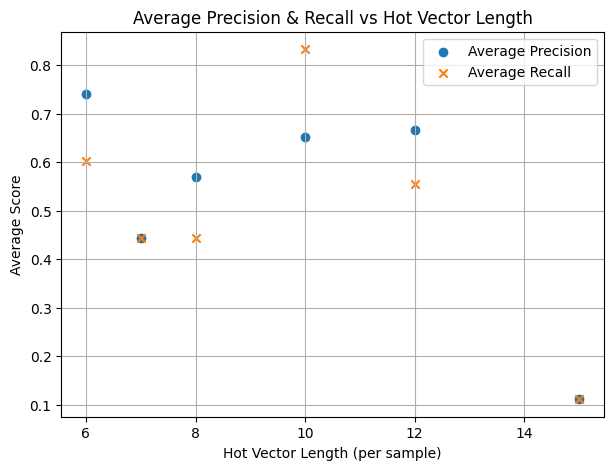

In [14]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# 長さごとに precision と recall を格納する辞書
metrics_by_length = defaultdict(lambda: {"precision": [], "recall": []})

for pred, ref in zip(predictions_data, references_data):
    p, r, f1 = calc_metrics(pred["hot_vector"], ref["hot_vector"])
    length = len(pred["hot_vector"])
    metrics_by_length[length]["precision"].append(p)
    metrics_by_length[length]["recall"].append(r)

# 長さの昇順に並べる
lengths = sorted(metrics_by_length.keys())

avg_precisions = [np.mean(metrics_by_length[l]["precision"]) for l in lengths]
avg_recalls = [np.mean(metrics_by_length[l]["recall"]) for l in lengths]

plt.figure(figsize=(7, 5))
plt.scatter(lengths, avg_precisions, marker='o', label="Average Precision")
plt.scatter(lengths, avg_recalls, marker='x', label="Average Recall")
plt.xlabel("Hot Vector Length (per sample)")
plt.ylabel("Average Score")
plt.title("Average Precision & Recall vs Hot Vector Length")
plt.legend()
plt.grid(True)
plt.show()